In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
F_D = pd.read_csv('Fraud_check.csv')

In [3]:
F_D.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
label_encoder = preprocessing.LabelEncoder()
F_D['Undergrad'] = label_encoder.fit_transform(F_D['Undergrad'])
F_D['Urban'] = label_encoder.fit_transform(F_D['Urban'])
F_D['Marital.Status'] = label_encoder.fit_transform(F_D['Marital.Status'])

In [8]:
F_D

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
F_D.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
row_index = F_D[F_D['Taxable.Income'] < 30000].index
row_index1 = F_D[F_D['Taxable.Income'] >= 30000].index

In [13]:
F_D.loc[row_index,'tax status'] = 'Good'
F_D.loc[row_index1,'tax status'] = 'Risky'

In [14]:
pd.set_option("display.max_rows",None)

In [15]:
F_D

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax status
0,0,2,68833,50047,10,1,Risky
1,1,0,33700,134075,18,1,Risky
2,0,1,36925,160205,30,1,Risky
3,1,2,50190,193264,15,1,Risky
4,0,1,81002,27533,28,0,Risky
5,0,0,33329,116382,0,0,Risky
6,0,0,83357,80890,8,1,Risky
7,1,2,62774,131253,3,1,Risky
8,0,2,83519,102481,12,1,Risky
9,1,0,98152,155482,4,1,Risky


In [17]:
x =  F_D.drop("tax status",axis=1)
y = F_D["tax status"]

In [22]:
#splitting data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

# Building Decision Tree

In [23]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(167.4, 163.07999999999998, 'X[2] <= 30055.5\nentropy = 0.712\nsamples = 420\nvalue = [82, 338]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 338\nvalue = [0, 338]')]

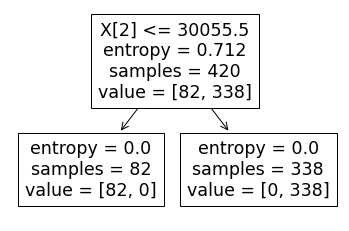

In [24]:
tree.plot_tree(model)

In [25]:
#Predicting Data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Risky    138
Good      42
dtype: int64

In [26]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
tax status,,
Good,42,0
Risky,0,138


In [27]:
np.mean(preds == y_test)*100

100.0